#**Opinions on Climate Change in America**

##Vivian Kim    |    DIGHUM 100  |  Professor Adam Anderson (Su21)

This research is based on responses of Americans that participated in a survey, asking their opinions on climate change. They were given a set of questions regarding to their beliefs, emotions, and intentions behind climate change/protecting environment, as well as their demographics. They also wrote a short free response to what they think the purpose of this survey is. The actual survey used can be found in my Portfolio.


###Questions to answer:

1) How do gender, age, and political view affect Americans to feel about the issue of climate change?

2) What are the most popular and least popular actions Americans are taking to conserve energy?

3) How do Americans feel about current environmental policies?

4) For those people who responded they are not sure about the purpose of this survey, how do they think differently about climate change from the rest?

Source of my data set: 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/8Z7M4G

__________________________

###**Data Loading and Sorting**

I decided to use Bokeh as my tool for visualization, so I downloaded and imported needed libraries for later, along with Pandas and Numpy for data manipulation and SciPy for statistical tests. I also mounted my Notebook.

In [ ]:
pip install bokeh

In [ ]:
pip install scikit-posthocs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns

from bokeh.layouts import row
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Label, LabelSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I used `read_csv` of Pandas to read and load the spreadsheet here.

In [ ]:
original = pd.read_csv('/content/drive/My Drive/climate_change_survey.csv')
original

,ResponseID,ResponseSet,Name,ExternalDataReference,Country,Status,StartDate,EndDate,Finished,Eff,Consent,Instruct1,ArticleIns,ArtInstruc,Neutral,HighEff,LowEff,ReadTime_1,ReadTime_2,ReadTime_3,ReadTime_4,MCIntro,Scary,Disgusting,Severe,Threaten,Effective,GWInstruct,GW01Trend,GW02HumDri,GW03Smoke,GW05Percen,GW06Solar,GW07Little,GW08Direct,GW09Threat,IntentionI,In01Bulbs,In02Winter,In03Summer,...,M07Positiv,M08Punish,M09Reward,M10Wrong,M11Right,PolicyIntr,Policies_Plastic,Policies_Reuse,Policies_Cup,Policies_Commute,Policies_Hybrid,Policies_MPG,Policies_Carpool,Disposable,Reusable,Drinks,Commuter,Hybrid,MPG,Carpool,DemoInstru,Gender,age,LibCon,Suspicion,Purpose,Thoughts,BebriefInt,Debriefing,GW06Solar_r,GW07Little_r,negEmoAvg,beliefAvg,intentionAvg,moralAvg,policyCount,filter_$,MatchSequence,ZintentionAvg,ZmoralAvg
0,R_a5BxDe7z2Z0cQTP,Live,Anonymous,NaN,India,0,6/22/15 9:07,6/22/15 9:26,1,-0.5,4,1,1,1,1,NaN,1.0,14.264,865.620,917.039,8.0,1,6,5,5,6,5,1,5,5,4,4,4,5,3,5,1,3,5,5,...,5,5,5,5,4,1,1,2,2,2,1,1,2,6.0,NaN,NaN,NaN,7.0,5.0,NaN,1,1,38,5,1,ns,no,1,1,4,3.00,5.50,4.125000,4.333333,4.818182,3,0,1.000000,NaN,NaN
1,R_0IDgSkavS2wKXxr,Live,Anonymous,NaN,India,0,6/22/15 9:27,6/22/15 9:31,1,0.5,4,1,1,1,1,1.0,NaN,0.000,0.000,50.808,0.0,1,6,6,5,5,5,1,5,5,6,4,4,5,4,3,1,5,4,4,...,6,6,3,5,5,1,1,1,1,1,2,2,1,8.0,8.0,7.0,7.0,NaN,NaN,6.0,1,2,34,5,1,not sure,no,1,1,4,3.00,5.50,4.250000,4.500000,5.000000,5,0,2.000000,NaN,NaN
2,R_0U4VlaZ8uxjZ6vj,Live,Anonymous,NaN,United States,0,6/16/15 9:53,6/16/15 9:59,1,-0.5,4,1,1,1,1,NaN,1.0,1.463,73.532,74.128,2.0,1,3,1,1,1,2,1,5,2,2,4,5,6,4,1,1,7,5,7,...,1,1,4,1,4,1,2,1,1,2,1,2,2,NaN,8.0,5.0,NaN,10.0,NaN,NaN,1,1,32,2,1,opinions on contributing to less energy usage,no,1,1,3,2.00,1.50,2.875000,4.250000,2.636364,3,0,1.000000,NaN,NaN
3,R_cMj9uAXKjAAA23P,Live,Anonymous,NaN,United States,0,6/22/15 9:19,6/22/15 9:24,1,-0.5,4,1,1,1,1,NaN,1.0,0.000,0.000,62.544,0.0,1,6,6,6,5,7,1,5,7,7,5,5,6,7,6,1,7,7,5,...,1,3,6,2,5,1,1,1,1,2,2,2,1,3.0,6.0,6.0,NaN,NaN,NaN,2.0,1,2,35,6,1,"\series of questions about your life experiences""",personality,"and/or beliefs \""\tnone""",3,2,5.75,5.25,5.166667,4.181818,4.000000,0,2,NaN,NaN,NaN
4,R_dduc9W9fslLYPeR,Live,Anonymous,NaN,United States,0,6/22/15 9:42,6/22/15 9:52,1,-0.5,4,1,1,1,1,NaN,1.0,0.000,0.000,135.238,0.0,1,3,5,5,3,2,1,5,5,4,5,5,3,2,4,1,6,5,7,...,2,3,5,5,5,1,2,1,1,2,1,2,2,NaN,5.0,5.0,NaN,1.0,NaN,NaN,1,2,41,4,1,social perception and how people feel on clima...,no thank you,1,1,3,5.00,4.00,4.125000,4.833333,4.000000,3,1,0.000000,0.134086,-0.444533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,R_54MpkdG1BkV0rBz,Live,Anonymous,NaN,United States,0,6/16/15 9:49,6/16/15 9:55,1,0.5,4,1,1,1,1,1.0,NaN,0.000,0.000,52.195,0.0,1,1,4,1,1,1,1,1,1,1,1,1,7,1,1,1,1,4,3,...,1,1,1,1,1,1,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,55,7,1,"\to see my view and belief on global warming""","climate change\""\tnone""",1,7,1,1.75,1.75,3.083333,1.000000,0.000000,1,0,-1.289551,-2.735345,NaN
410,R_9Ze3jjDVN9aFEUJ,Live,Anonymous,NaN,United States,0,6/16/15 10:30,6/16/15 10:37,1,-0.5,4,1,1,1,1,NaN,1.0,0.000,0.000,162.008,0.0,1,6,6,6,5,6,1,6,5,6,6,3,2,6,6,1,6,6,7,...,6,6,7,7,6,1,1,1,1,1,1,1,1,1.0,1.0,2.0,2.0,10.0,8.0,2.0,1,2,33,1,1,peoples views on the environment,no,1,1,5,6.00,5.75,5.750000,5.833333,5.909091,7,1,0.000000,0.947593,1.013256
411,R_9F5ASMASYK5tfqB,Live,Anonymous,NaN,United States,0,6/22/15 10:01,6/22/15 10:06,1,0.5,4,1,1,1,1,1.0,NaN,0.000,0.000,84.319,0.0,1,5,5,5,4,5,1,4,4,4,4,4,4,5,5,1,5,4,5,...,4,5,4,4,4,1,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,26,6,1,Perception,Thanks,1,1,4,4.00,4.75,4.250000,5.500000,4.272727,0,1,0.000000,0.676424,-0.236278
412,R_4MIhsXSC5ULFLb7,Live,Anonymous,NaN,United States,0,6/1

The data set contains countries that are not "United Sates" and I only want to focus on responses from Americans, so I dropped any rows with its country names not "United States."

In [ ]:
original_us = original.loc[original['Country'] == 'United States']
original_us['Country']

2      United States
3      United States
4      United States
5      United States
6      United States
           ...      
409    United States
410    United States
411    United States
412    United States
413    United States
Name: Country, Length: 402, dtype: object

The code below shows that every entry is unique, meaning no one filled out the survey twice.

In [ ]:
len(original_us) == len(original_us['ResponseID'].unique())

True

As the column `Gender` is in 1's and 2's (1 is *Male* and 2 is *Female*), I changed to words for readability.

In [ ]:
original_us.loc[original_us['Gender'] == 1,'Gender'] = 'male'
original_us.loc[original_us['Gender'] == 2,'Gender'] = 'female'
original_us['Gender']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


2        male
3      female
4      female
5        male
6      female
        ...  
409    female
410    female
411    female
412    female
413    female
Name: Gender, Length: 402, dtype: object

__________________

###**Question 1**

The columns `Scary`, `Disgusting`, `Severe`, `Threaten`, and `Effective` (**Part 3 - Negative Emotions and Efficacy** in the survey) corresponse to questions with a range of numbers [1 = *not at all*, 7 = very much]:



1. How scary is global warming?
2. How disgusting are carbon emissions? 
3. How severe is climate change?
4. How much does climate change threaten you personally?
5. How effective is individual effort in combating climate change?



The columns `GW01Trend`,	`GW02HumDri`,	`GW03Smoke`,	`GW05Percen`,	`GW06Solar`,	`GW07Little`,	`GW08Direct` and `GW09Threat` (**Part 4 - Climate Change Bliefs**) correspond to questions with a range of numbers [1 = *strongly disagree*, 4 = *neither agree nor disagree*, 7 =  *strongly agree*]:

1.   Scientific evidence points to a warming trend in global climate.
2. Human activity has been the driving force behind the warming trend over the last
50 years.
3. The release of CO2 (carbon dioxide) from human activity (such as smoke stacks
and car emissions) has played a central role in raising the average surface
temperature of the earth.
4. The likelihood that emissions are the main cause of the observed warming trend
of the last 50 years is between 90 and 99%.
5. Natural phenomena such as solar variations combined with volcanic activity are
the real cause of the warming effect. [reverse scored]
6. Humans have very little effect on climate temperature. [reverse scored]
7. An increase in CO2 (carbon dioxide) is directly related to an increase in global
temperature.
8. Global warming presents a serious threat to human life.

However, for the sake of easier interpretation of the averages, I excluded Statements 5 and 6 from above since these two statements have reverse scores.

The columns `In01Bulbs`, `In02Winter`, `In03Summer`, `In04Washin`, `In05Dryer`, `In06Recycl`, `In07Paper`, `In08Water`, `In09Bags`, `In10Drive`, `In11Vote`, and `In12Write` correspond to **Part 5 - Energy Conservation Intentions** of the survey [1 = *not at all*, 7 = *definitely*].



1. I intend to replace light bulbs in my home with more energy efficient bulbs
2. In intend to set my thermostat/heater no higher than 65° F in the winter
3. I intend to set my thermostat/air conditioning no lower than 75° F in the summer
4. I intend to use the washing machine only when I have a full load
5. I intend to use a clothesline instead of a dryer when possible
6. I intend to recycle at home
7. I intend to buy recycled paper
8. I intend to drink tap water over bottled beverages when possible
9. I intend to use a reusable or recycled shopping bag instead of disposable bags
10. I intend to drive less/not at all
11. I intend to vote for politicians who support environmental initiatives
12. I intend to write to my representatives about environmental concerns



The columns `M01Suffer`,	`M02Rights`,	`M03Proud`,	`M04Guilty`,	`M05Virtuou`,	`M06Negativ`,	`M07Positiv`,	`M08Punish`,	`M09Reward`,	`M10Wrong`,	and `M11Right` (**Part 6 - Climate Change Moralization**) correspond to questions on a scale of numbers [1 = *strongly disagree*, 4 = *neither agree nor disagree*, 7 = *strongly agree*]


1.   Preventing global warming decreases suffering in others.
2. Preventing global warming protects others’ rights.
3. By taking action against global warming, I can feel good about myself.
4. Recycling is morally good.
5. Using disposable shopping bags is morally wrong.
6. Cutting down trees is morally wrong.
7. Using excessive heat in one's home is morally wrong.
8. Using too much energy is morally wrong.
9. Reducing energy consumption is morally good.
10. Putting recyclable goods in the regular trash is morally wrong.
11. Using a clothesline instead of the dryer is morally good.

**The `LibCon` responds to political beliefs (1 = *strongly liberal*, 7 = *strongly conservative*).**

From the scales used in each part of the survey, we can see that lower numbers mean that the individual does **NOT** have negative emotions/beliefs about climate change and intention to conserve energy and morals about environmentally-friendly activities.

For each part of the survey, I picked out the corresponding columns and computed the averaged of those columns for each individual and added to columns `avgP3`, `avgP4`, `avgP5`, and `avgP6`.

In [ ]:
responses = original_us[['Gender', 'age', 'LibCon', 'Scary', 'Disgusting', 'Severe', 'Threaten', 'Effective', 'GW01Trend', 'GW02HumDri', 'GW03Smoke', 'GW05Percen', 'GW08Direct', 'GW09Threat', 'In01Bulbs', 'In02Winter', 'In03Summer', 'In04Washin', 'In05Dryer', 'In06Recycl', 'In07Paper', 'In08Water', 'In09Bags', 'In10Drive', 'In11Vote', 'In12Write', 'M01Suffer', 'M02Rights', 'M03Proud', 'M04Guilty', 'M05Virtuou', 'M06Negativ', 'M07Positiv', 'M08Punish', 'M09Reward', 'M10Wrong', 'M11Right']]
responses

,Gender,age,LibCon,Scary,Disgusting,Severe,Threaten,Effective,GW01Trend,GW02HumDri,GW03Smoke,GW05Percen,GW08Direct,GW09Threat,In01Bulbs,In02Winter,In03Summer,In04Washin,In05Dryer,In06Recycl,In07Paper,In08Water,In09Bags,In10Drive,In11Vote,In12Write,M01Suffer,M02Rights,M03Proud,M04Guilty,M05Virtuou,M06Negativ,M07Positiv,M08Punish,M09Reward,M10Wrong,M11Right
2,male,32,2,3,1,1,1,2,5,2,2,4,4,1,7,5,7,6,1,6,4,5,1,4,4.0,1,4,4,4,4,1,1,1,1,4,1,4
3,female,35,6,6,6,6,5,7,5,7,7,5,7,6,7,7,5,6,2,7,3,5,6,3,5.0,6,5,6,7,5,1,5,1,3,6,2,5
4,female,41,4,3,5,5,3,2,5,5,4,5,2,4,6,5,7,6,6,7,5,2,4,4,4.0,2,4,2,5,5,3,5,2,3,5,5,5
5,male,53,7,1,5,2,4,5,6,1,1,1,4,2,1,2,2,7,4,7,2,7,2,1,2.0,1,4,1,1,4,1,1,1,1,4,4,4
6,female,32,4,5,7,6,5,4,6,5,5,5,5,7,6,5,5,6,7,7,4,2,3,5,5.0,3,7,6,6,7,4,6,4,4,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,female,55,7,1,4,1,1,1,1,1,1,1,1,1,1,4,3,4,4,4,4,4,3,1,4.0,1,1,1,1,1,1,1,1,1,1,1,1
410,female,33,1,6,6,6,5,6,6,5,6,6,6,6,6,6,7,7,4,6,6,6,6,5,6.0,5,6,6,6,7,3,5,6,6,7,7,6
411,female,26,6,5,5,5,4,5,4,4,4,4,5,5,5,4,5,6,5,7,7,5,6,6,5.0,5,4,4,4,6,4,4,4,5,4,4,4
412,female,27,7,2,2,2,2,4,2,1,2,3,1,2,2,1,1,7,7,7,2,7,3,1,2.0,1,3,3,3,3,1,1,1,3,3,1,3


The column `total_avg` has the average values of `avgP3`, `avgP4`, `avgP5`, and `avgP6`.

In [ ]:
responses['avgP3'] = responses.loc[:, ['Scary', 'Disgusting', 'Severe', 'Threaten', 'Effective']].mean(axis=1)
responses['avgP4'] = responses.loc[:, ['GW01Trend', 'GW02HumDri', 'GW03Smoke', 'GW05Percen', 'GW08Direct', 'GW09Threat']].mean(axis=1)
responses['avgP5'] = responses.loc[:, ['In01Bulbs', 'In02Winter', 'In03Summer', 'In04Washin', 'In05Dryer', 'In06Recycl', 'In07Paper', 'In08Water', 'In09Bags', 'In10Drive', 'In11Vote', 'In12Write']].mean(axis=1)
responses['avgP6'] = responses.loc[:, ['M01Suffer', 'M02Rights', 'M03Proud', 'M04Guilty', 'M05Virtuou', 'M06Negativ', 'M07Positiv', 'M08Punish', 'M09Reward', 'M10Wrong', 'M11Right']].mean(axis=1)
responses['total_avg'] = responses.loc[:, ['avgP3', 'avgP4', 'avgP5', 'avgP6']].mean(axis=1)
responses = responses.loc[:, ['Gender', 'age', 'LibCon', 'avgP3', 'avgP4', 'avgP5', 'avgP6', 'total_avg']]
responses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Gender,age,LibCon,avgP3,avgP4,avgP5,avgP6,total_avg
2,male,32,2,1.6,3.000000,4.250000,2.636364,2.871591
3,female,35,6,6.0,6.166667,5.166667,4.181818,5.378788
4,female,41,4,3.6,4.166667,4.833333,4.000000,4.150000
5,male,53,7,3.4,2.500000,3.166667,2.363636,2.857576
6,female,32,4,5.4,5.500000,4.833333,5.363636,5.274242
...,...,...,...,...,...,...,...,...
409,female,55,7,1.6,1.000000,3.083333,1.000000,1.670833
410,female,33,1,5.8,5.833333,5.833333,5.909091,5.843939
411,female,26,6,4.8,4.333333,5.500000,4.272727,4.726515
412,female,27,7,2.4,1.833333,3.416667,2.272727,2.480682


For reference, I computed the total average, the average of all respondents.

In [ ]:
responses['total_avg'].mean()

4.9004852630785445

####Gender

I used the `groupby` feature to group `responses` by gender and political preference. For age, I wanted to see the spread so I opted to plot everyone's total average score. I used Bokeh to visualize my data sets. By making a separate data frame for each category, I can easily compare the values and check if my graphs make sense.

In [ ]:
by_gender = responses.groupby('Gender').mean('total_avg').loc[:, ['total_avg']]
by_gender

,total_avg
Gender,
female,4.980075
male,4.801331


Since it's a categorical values (female, male) I used a bar graph. The two averages are not too far off from each other and hard to see the difference in the graph, so I annotated the actual values on top of each bar.

In [ ]:
output_notebook()
source = ColumnDataSource(data=dict(gender=by_gender.index.tolist(),
                                    score=by_gender.values.flatten(),
                                    values=[4.980075, 4.801331]))

graph1 = figure(plot_width=600, plot_height=400, title = "Average Score by Gender", x_range=by_gender.index.tolist(), x_axis_label='Gender', y_axis_label='Average Score')
graph1.vbar(by_gender.index.tolist(), top = by_gender.values.flatten(), width = 0.4, color=['#CE5C5E', '#E2AA60'])
labels = LabelSet(x='gender', y='score', text='values',
              x_offset=-35, y_offset=0, source=source, render_mode='canvas')

graph1.add_layout(labels)
show(graph1)

I wanted to check if the number of responses received from males and females are not too skewed in the code below.

In [ ]:
num_females = responses.loc[responses['Gender'] == 'female'].count()[0]
num_males = len(responses) - num_females

print('Number/percentage of males:', num_males, '(', round(num_males/len(responses)*100, 2), '%)')
print('Number/percentage of females:', num_females, '(', round(num_females/len(responses)*100, 2), '%)')

Number/percentage of males: 179 ( 44.53 %)
Number/percentage of females: 223 ( 55.47 %)


These values are quite close to each other thus it's hard to compare. In such events, I can use a 2 sample T-test to see if the difference in their average scores are statistically significant. In order to perform a T-test, I need to check first if the conditions are met (*n = sample size*):

1. 2 simple random samples (SRS)
2. Both populations are normally distributed, but good enough if they have similar shapes and no strong outliers
3. For large sample sizes, the distributions can be skewed or in different shapes

We assume each survey was filled out independently from one another. As to its sample size, the number data points of females and males are 179 and 223 respectively, allowing us to use T procedures. Yet I made an overlaid histogram of female and male data to see if their shapes are similar. The conditions mentioned here are from lecture notes of PBLHLTH 142, UC Berkeley.

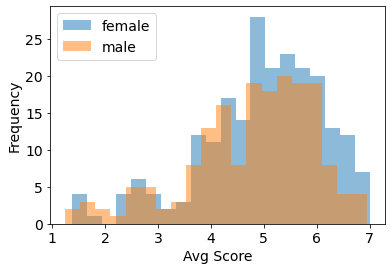

In [ ]:
female = responses.loc[responses['Gender'] == 'female']['total_avg']
male = responses.loc[responses['Gender'] == 'male']['total_avg']

plt.hist(female, bins=20, label='female', alpha=0.5);
plt.hist(male, bins=20, label='male', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Avg Score')
plt.ylabel('Frequency');

I used `ttest_ind` from SciPy for the T-test of independence. It compares the mean values of female and male data and see if their difference means something statistically. I set `equal_var` to `True` as according to Zach from Statology (https://www.statology.org/two-sample-t-test-python/) suggests that if the ratio of the larger sample's variance to the smaller sample's is less than 4:1, it is safe to assume they have an equal population variance. The code below shows that the ratio is 0.97.

Our null hypothesis is that the two means are equal and alternative hypothesis is that the two means are not equal.

In [ ]:
print(np.var(female)/np.var(male))

0.9711767743892945


In [ ]:
stats.ttest_ind(female, male, equal_var = True)

Ttest_indResult(statistic=1.5112995116554644, pvalue=0.13150174061824876)

At 5% level, I reject the alternative hypothesis as my P-value is 13.2%. Although I can't conclude that my nul hypothesis is "correct," a high P-value supports the null hypothesis. Thus the two means are equal, statistically.

####Age

I extracted the `age` and `total_avg` columns from `responses` data frame. I also assigned `age` and `total_avg` columns to variables to I can use them later to find the equation of the regression line.

In [ ]:
by_age = responses.loc[:, ['age', 'total_avg']]
xx = by_age['age'].tolist()
yy = by_age['total_avg'].tolist()

by_age

,age,total_avg
2,32,2.871591
3,35,5.378788
4,41,4.150000
5,53,2.857576
6,32,5.274242
...,...,...
409,55,1.670833
410,33,5.843939
411,26,4.726515
412,27,2.480682


Using `linregress` from SciPy, I computed the slope and the intercept of the regression line. Unlike the other two graphs that uses gender and political view against the average score, the data points in this graph is more spread out so I think it's appropriate to have a regression line to better compare the relationship between the two variables (avgerage score and age). 

In [ ]:
slope = stats.linregress(xx, yy).slope
intercept = stats.linregress(xx, yy).intercept
print(slope, intercept)

-0.0034873628800841452 5.026481428427656


I had a choice between a scatter and a line plot, but I thought it is easier to see the relationship between the average score and age in a scatter plot. 

In [ ]:
output_notebook()

graph2 = figure(plot_width=600, plot_height=400, title = 'Average Score by Age', x_axis_label='Age', y_axis_label='Average Score')
graph2.circle(xx, yy, line_color='#849C2D', size=5, legend_label='Average Score')
graph2.line(xx, [slope*i + intercept for i in xx], line_color='#CE5C5E', legend_label='Line of Best-fit')

graph2.legend.location = 'bottom_right'

show(graph2)

The slope (red line) in the graph suggests that the two variables are slightly negatively correlated. The same `lingress` function gives R-value, so I computed below.

In [ ]:
r_val = stats.linregress(xx, yy).rvalue
r_val

-0.03459002662723219

The R-value is -0.0345, which is very close to 0, and 0 would mean that there is no correlation between the two variables. I calculated R-squared value to see how much of the data points are explained by the regression line.

In [ ]:
r_sq_val = r_val ** 2
r_sq_val

0.001196469942072632

Turns out only about 0.12% of the data points in this graph is represented by the regression line. It means that the regression line doesn't represent the underlying relationship well.

####Political Preference

In [ ]:
# Selected the political preference and average score columns
pp_resp = responses[['LibCon', 'total_avg']]
pp_resp

,LibCon,total_avg
2,2,2.871591
3,6,5.378788
4,4,4.150000
5,7,2.857576
6,4,5.274242
...,...,...
409,7,1.670833
410,1,5.843939
411,6,4.726515
412,7,2.480682


Due to the multiple categorical variables like seen here (1 to 7), I used an one-way ANOVA (Analysis of Variance) to see whether or not the mean of each group is statistically different. Following are the references I used to conduct an one-way ANOVA.

ANOVA: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

color: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

The one-way ANOVA test compares means of multiple categorical variables to the population mean, which should be equal to each other if political preference does not play any role in the average scores. There are some assumptions though before conducting one:

1.   The samples are independent.
2.   Each sample is from a normally distributed population.
3.   The population standard deviations of the groups are equal.

The samples are independent. To see if the population is normally distributed, I graphed a histogram and found out that the average score is fairly skewed.

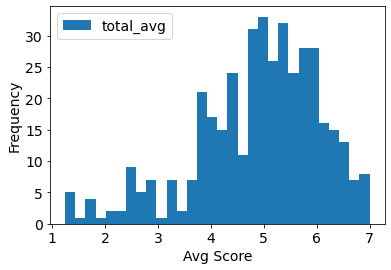

In [ ]:
plt.hist(responses['total_avg'],bins=30, label='total_avg')
plt.legend(loc='upper left')
plt.xlabel('Avg Score')
plt.ylabel('Frequency');

According to https://www.statology.org/anova-assumptions/, a one-way ANOVA is usually robust to the normality assumption is the sample size is large. I also checked the sample sizes per group and they are all large (> 5). However, the standard deviations (shown below) for each group is *very different* from one another, thus the third assumption is violated. In that case, the website suggested using a ***Kruskal-Wallis test***, a non-parametric version of the one-way ANOVA that compares the population **median** of all groups.

In [ ]:
print("Group size: ", responses.groupby('LibCon').size())
print("\nStandard deviations: ", responses.groupby('LibCon').std()['total_avg'])

Group size:  LibCon
1     57
2     89
3     63
4    101
5     45
6     26
7     21
dtype: int64

Standard deviations:  LibCon
1    0.879674
2    0.883271
3    0.835896
4    1.138063
5    1.344716
6    1.097052
7    1.510272
Name: total_avg, dtype: float64


For visualization, I used a boxplot since having 7 different histograms overlaid on top of each other would make the graph very hard to interpret. This time I used Seaborn instead of Bokeh for simplicity. The colors represent the associated political groups: blue for democratic and red for republican parties.

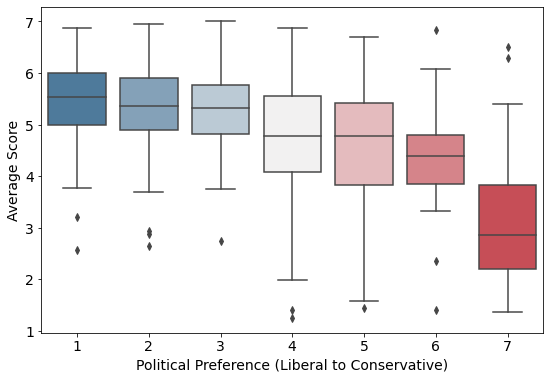

In [ ]:
plt.figure (figsize= (9, 6)) 
plt.rc('font', size=14) 
ax = sns.boxplot(x='LibCon', y='total_avg', data=pp_resp, palette=sns.diverging_palette(240, 10, n=7))
#plt.plot(np.linspace(-0.5, 6.5, 10), [-0.33391794108968026 * i + 6.015027841384413 for i in np.linspace(-0.5, 6.5, 10)], color='#FF9D00', label='Line of Best-fit', zorder=10)
plt.xlabel('Political Preference (Liberal to Conservative)')
#plt.legend(loc='lower left')
plt.ylabel('Average Score')
plt.show()

I conducted a Kruskal-Wallis test below and got a P-value of 8.344e-13, which is much smaller than 0.05, the 5% significance level. Hence I concluded that not all medians are equal and the difference is statistically **significant**. For interpretation, I used https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/nonparametrics/how-to/kruskal-wallis-test/interpret-the-results/all-statistics/ as a reference.

In [ ]:
stats.kruskal(pp_resp['total_avg'][pp_resp['LibCon'] == 1],
               pp_resp['total_avg'][pp_resp['LibCon'] == 2],
               pp_resp['total_avg'][pp_resp['LibCon'] == 3],
               pp_resp['total_avg'][pp_resp['LibCon'] == 4],
               pp_resp['total_avg'][pp_resp['LibCon'] == 5],
               pp_resp['total_avg'][pp_resp['LibCon'] == 6],
               pp_resp['total_avg'][pp_resp['LibCon'] == 7])

KruskalResult(statistic=68.4887024259113, pvalue=8.343836080373994e-13)

To see in-group comparisons, I conducted Dunn's test. Dunn's test is used to complement Kruskal-Wallis test by showing exactly how different each groups are to another. The `p_adjust` is set to `bonferroni` to fix the family-wise error rate (chance of "false positive").

Dunn's Test: https://www.statology.org/dunns-test-python/ 

https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/. 

https://www.statology.org/family-wise-error-rate/

In [ ]:
sp.posthoc_dunn(pp_resp, val_col='total_avg', group_col='LibCon', p_adjust = 'bonferroni')

,1,2,3,4,5,6,7
1,1.000000e+00,1.000000e+00,1.000000,0.000344,0.005288,0.000094,5.404290e-08
2,1.000000e+00,1.000000e+00,1.000000,0.001086,0.019945,0.000345,1.864127e-07
3,1.000000e+00,1.000000e+00,1.000000,0.069983,0.263305,0.006241,8.283903e-06
4,3.440440e-04,1.085949e-03,0.069983,1.000000,1.000000,1.000000,1.615983e-02
5,5.287906e-03,1.994465e-02,0.263305,1.000000,1.000000,1.000000,5.825796e-02
6,9.367369e-05,3.449001e-04,0.006241,1.000000,1.000000,1.000000,1.000000e+00
7,5.404290e-08,1.864127e-07,0.000008,0.016160,0.058258,1.000000,1.000000e+00


Looking at the table above, focus on the pair-wise comparisons of adjusted P-values that are less than 0.05, and this includes (highest to lowest):

1.   1 and 7 (5.404e-8)
2.   2 and 7 (1.186e-7)
3.   3 and 7 (8.284e-6)
4.   1 and 6 (9.367e-5)
5.   1 and 4 (3.440e-4)
6.   2 and 6 (3.449e-4)
7.   2 and 4 (1.086e-3)
8.   1 and 5 (5.288e-3)
9.   3 and 6 (6.241e-3)
10.   4 and 7 (1.6160e-2)
11.   2 and 5 (1.994e-2)

The median differences in these groups are statistically significant.



In [ ]:
from itertools import combinations

# calculating all possible combinations
count = combinations ([1,2,3,4,5,6,7], 2)
print(len(list(count)))

21


#### Feature Comparison

I wanted to see which variable out of the three (gender, age, political preference) is the most "important." I used the `heatmap` from of `seaborn` and it maps the correlation of each responsive variable. I followed the code from
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e.

In [ ]:
resp_feat = responses[['Gender', 'age', 'LibCon', 'total_avg']]

# switched the "Gender" column back to numbers instead of strings.
resp_feat.loc[resp_feat['Gender'] == 'female','Gender'] = 1
resp_feat.loc[resp_feat['Gender'] == 'male','Gender'] = 2
resp_feat.rename(columns={'age':'Age'}, inplace=True)
resp_feat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Age,LibCon,total_avg
2,2,32,2,2.871591
3,1,35,6,5.378788
4,1,41,4,4.150000
5,2,53,7,2.857576
6,1,32,4,5.274242
...,...,...,...,...
409,1,55,7,1.670833
410,1,33,1,5.843939
411,1,26,6,4.726515
412,1,27,7,2.480682


Changed the type of `Gender` to `int64` for `corr()` to recognize it as a feature. (https://stackoverflow.com/questions/51198184/seaborn-heatmap-not-showing-columns-converted-from-string-to-numerical)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


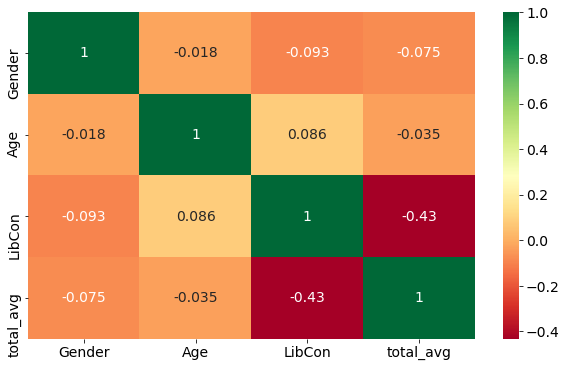

In [ ]:
import seaborn as sns
X = resp_feat.iloc[:, 0:3]
y = resp_feat['total_avg']
resp_feat['Gender'] = resp_feat['Gender'].astype('int64')
corrmat = resp_feat.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10, 6))
g = sns.heatmap(resp_feat[top_corr_features].corr(), annot=True, cmap='RdYlGn')

_________________

###**Question 2**

In this question, I used answers to the **Part 5 - Energy Conservation Intentions** in the survey. This is about intentions people have for energy conservations, ranging from 1 = *not at all* to 7 = *definitely*.


1.   I intend to replace light bulbs in my home with more energy efficient bulbs.
2. I intend to set my thermostat/heater no higher than 65° F in the winter.
3. I intend to set my thermostat/air conditioning no lower than 75° F in the summer.
4. I intend to use the washing machine only when I have a full load.
5. I intend to use a clothesline instead of a dryer when possible.
6. I intend to recycle at home.
7. I intend to buy recycled paper.
8. I intend to drink tap water over bottled beverages when possible.
9. I intend to use a reusable or recycled shopping bag instead of disposable bags.
10. I intend to drive less/not at all.
11. I intend to vote for politicians who support environmental initiatives.
12. I intend to write to my representatives about environmental concerns.

I figured the very last statement (Statement 12) does not have an actual consequence in environment, as opposed to other statements which will have a direct impact. Thus I excluded it when calculating averages to each statement.

I selected the columns for Part 5, except for the last statement.

In [ ]:
int_responses = original_us[['In01Bulbs', 'In02Winter', 'In03Summer', 'In04Washin', 'In05Dryer', 'In06Recycl', 'In07Paper', 'In08Water', 'In09Bags', 'In10Drive', 'In11Vote']]
int_responses

,In01Bulbs,In02Winter,In03Summer,In04Washin,In05Dryer,In06Recycl,In07Paper,In08Water,In09Bags,In10Drive,In11Vote
2,7,5,7,6,1,6,4,5,1,4,4.0
3,7,7,5,6,2,7,3,5,6,3,5.0
4,6,5,7,6,6,7,5,2,4,4,4.0
5,1,2,2,7,4,7,2,7,2,1,2.0
6,6,5,5,6,7,7,4,2,3,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...
409,1,4,3,4,4,4,4,4,3,1,4.0
410,6,6,7,7,4,6,6,6,6,5,6.0
411,5,4,5,6,5,7,7,5,6,6,5.0
412,2,1,1,7,7,7,2,7,3,1,2.0


 From this data frame, I calculated means of each column and sorted from the lowest to highest to see what is the most popular/least popular environmental-friendly activities in America.

In [ ]:
int_responses.mean(axis=0).sort_values()

In05Dryer     3.353234
In10Drive     3.850746
In02Winter    4.427861
In03Summer    4.664179
In07Paper     4.796020
In11Vote      5.014963
In09Bags      5.019900
In08Water     5.268657
In01Bulbs     5.485075
In06Recycl    5.743781
In04Washin    5.791045
dtype: float64

For a better representation on my story board of the table above, I created another data frame below.

In [ ]:
int_data = [['Dryer', 3.353234], ['Drive', 3.850746], ['Winter', 4.427861], ['Summer', 4.664179], 
            ['Paper', 4.796020], ['Vote', 5.014963], ['Bags', 5.019900], ['Water', 5.268657],
            ['Bulbs', 5.485075], ['Recycling', 5.743781], ['Washing', 5.791045]]

int_table = pd.DataFrame(int_data, columns = ['Activities', 'Average Score'])
int_table.set_index('Activities')

,Average Score
Activities,
Dryer,3.353234
Drive,3.850746
Winter,4.427861
Summer,4.664179
Paper,4.796020
Vote,5.014963
Bags,5.019900
Water,5.268657
Bulbs,5.485075


The top two **least favorite** activies are giving up using a dryer and driving less/not at all, followed by not using a heater/AC. The top two **favorite** activities are waiting to use a washing maching until a full load and recycling.

________________________

###**Question 3**

The columns `Policies_Plastic`,	`Policies_Reuse`,	`Policies_Cup`,	`Policies_Commute`,	`Policies_Hybrid`,	`Policies_MPG`,	and `Policies_Carpool` correspond to the responds people answered to **Part 7 - Climate Change Policies** in the survey. The following questions are Y/N questions if they agree or not to the specific policy. The number *1* means *YES* and *2* means NO. 

1. A fee for each disposable plastic shopping bag used.
2. A small rebate for each reusable shopping bag used.
3. A small rebate for each reusable drinking cup used for a take-out beverage (e.g.,
coffee).
4. A commuter tax for driving a car alone during rush hour (6 AM-10 AM and 4 PM-8 PM).
5. Tax credits for purchasing hybrid and electric vehicles.
6. A fee for buying a car with a fuel efficiency less than 25 miles per gallon.
7. Extra paid time off for employees who carpool.

In [ ]:
pol_responses = original_us[['Policies_Plastic', 'Policies_Reuse', 'Policies_Cup', 'Policies_Commute', 'Policies_Hybrid', 'Policies_MPG', 'Policies_Carpool']]
pol_responses

,Policies_Plastic,Policies_Reuse,Policies_Cup,Policies_Commute,Policies_Hybrid,Policies_MPG,Policies_Carpool
2,2,1,1,2,1,2,2
3,1,1,1,2,2,2,1
4,2,1,1,2,1,2,2
5,2,2,2,2,2,2,2
6,2,1,1,2,1,2,1
...,...,...,...,...,...,...,...
409,2,2,2,2,2,2,2
410,1,1,1,1,1,1,1
411,2,2,2,2,2,2,2
412,2,1,1,2,1,2,1


Similar to Question 2, I found the mean for each column and sorted in ascending order.

In [ ]:
pol_responses.mean(axis=0).sort_values()

Policies_Reuse      1.136816
Policies_Hybrid     1.166667
Policies_Cup        1.194030
Policies_Carpool    1.417910
Policies_Plastic    1.509950
Policies_MPG        1.554726
Policies_Commute    1.788557
dtype: float64

The list above has the most agreed policy to the least agreed in order. From this we can see that policies that compensate are more popular than the ones charging fees, understandably. 

In [ ]:
pol_data = [['Reuse', 1.136816], ['Hybrid', 1.166667], ['Cup', 1.194030], ['Carpool', 1.417910], 
            ['Plastic', 1.509950], ['MPG', 1.554726], ['Commute', 1.788557]]

pol_table = pd.DataFrame(pol_data, columns = ['Policies', 'Average Score'])
pol_table.set_index('Policies')

,Average Score
Policies,
Reuse,1.136816
Hybrid,1.166667
Cup,1.194030
Carpool,1.417910
Plastic,1.509950
MPG,1.554726
Commute,1.788557


__________________

###**Question 4**

To analyze those who responded they are not sure about the purpose of this survey, I selected the columns `Gender`, `age`, `LibCon`, and `Purpose`.

In [ ]:
pur_responses = original_us[['Gender', 'age',	'LibCon', 'Purpose']]
pur_responses

,Gender,age,LibCon,Purpose
2,male,32,2,opinions on contributing to less energy usage
3,female,35,6,"\series of questions about your life experiences"""
4,female,41,4,social perception and how people feel on clima...
5,male,53,7,To see if attitudes about global warming are c...
6,female,32,4,To see how we felt about the theory of climate...
...,...,...,...,...
409,female,55,7,"\to see my view and belief on global warming"""
410,female,33,1,peoples views on the environment
411,female,26,6,Perception
412,female,27,7,Indoctrination about the supposed link between...


I displayed only the column `Purpose` to read over some of them.

In [ ]:
print(pur_responses[['Purpose']].values)

[['opinions on contributing to less energy usage']
 ['\\series of questions about your life experiences"']
 ['social perception and how people feel on climate change']
 ['To see if attitudes about global warming are consistent within the non-scientific.']
 ['To see how we felt about the theory of climate change and what we would do to decrease global worming.']
 ['Seeing the influence an explanation that the individual has little effect on global warming has.']
 ["To see if people's moral beliefs affect how they treat our economy and enviorment"]
 ['Willingness to change habits to support conservation']
 ['It is about my views on global warming.']
 ['I think the purpose of this study is to try and influence people to be more green.']
 ['I think that opinions on global warming are being solicited and that you want to know how adaptable people want to be in trying to combat the problem of global warming.']
 ['If people believe global warming is real.']
 ['what people think about global w

I figured that not a significant amount of people but some responded "unsure" as their answer. I filtered the `Purpose` column to only select those people below.

In [ ]:
unsure = ['unsure', 'not sure', 'dont know', "don't know", 'guess', 'no idea']
unsure_resp = pur_responses[(pur_responses['Purpose'].str.contains('|'.join(unsure), case=False)) & (pur_responses['Purpose'].str.len() < 30)]
unsure_resp

,Gender,age,LibCon,Purpose
24,male,31,3,I don't know
47,male,21,1,I can't even begin to guess.
57,female,19,2,no idea
60,male,24,3,Not sure
100,female,21,1,I'm not sure
147,male,34,1,I am not sure.
157,male,23,4,unsure
211,male,43,4,I'm not sure.
222,female,34,2,unsure
233,female,24,4,not sure


Sixteen people responded "unsure" and out of everyone who filled out this survey, that is about 3.98% of all respondents. 

In [ ]:
len(unsure_resp)/len(original_us)

0.03980099502487562

Some of these 16 respondents might have been lazy with their responses, but I think it's a true threat when people actually don't see the point of this survey after reading a page long reading about disasterous phenomena. To see if these people are insensitive to climate change, I repeated a similar analysis done in Question 1. I joined `unsure_resp` and `responses` and the `inner` command picks out only the rows that exists in both tables, matching indices.

In [ ]:
unsure_resp = unsure_resp.merge(responses, how='inner', left_index=True, right_index=True)
unsure_resp

,Gender_x,age_x,LibCon_x,Purpose,Gender_y,age_y,LibCon_y,avgP3,avgP4,avgP5,avgP6,total_avg
24,male,31,3,I don't know,male,31,3,4.8,4.666667,4.166667,3.909091,4.385606
47,male,21,1,I can't even begin to guess.,male,21,1,6.4,7.000000,4.083333,4.909091,5.598106
57,female,19,2,no idea,female,19,2,5.8,6.500000,3.583333,6.000000,5.470833
60,male,24,3,Not sure,male,24,3,4.2,4.000000,4.083333,3.909091,4.048106
100,female,21,1,I'm not sure,female,21,1,4.8,5.666667,4.500000,4.000000,4.741667
147,male,34,1,I am not sure.,male,34,1,6.6,7.000000,5.916667,5.636364,6.288258
157,male,23,4,unsure,male,23,4,5.4,4.666667,4.500000,3.909091,4.618939
211,male,43,4,I'm not sure.,male,43,4,4.2,5.666667,3.250000,3.272727,4.097348
222,female,34,2,unsure,female,34,2,6.0,6.500000,5.500000,6.181818,6.045455
233,female,24,4,not sure,female,24,4,4.2,5.000000,2.166667,5.000000,4.091667


I computed the average of this "unsure" group.

In [ ]:
avg_unsure = unsure_resp.mean()['total_avg']
avg_unsure

4.8504261363636365

The `sure_resp` has the respondents who did not answer "unsure" to the question. I anti-merged `unsure_resp` and `responses` by indices.

In [ ]:
sure_resp = responses[~responses.index.isin(unsure_resp.index)]
sure_resp

,Gender,age,LibCon,avgP3,avgP4,avgP5,avgP6,total_avg
2,male,32,2,1.6,3.000000,4.250000,2.636364,2.871591
3,female,35,6,6.0,6.166667,5.166667,4.181818,5.378788
4,female,41,4,3.6,4.166667,4.833333,4.000000,4.150000
5,male,53,7,3.4,2.500000,3.166667,2.363636,2.857576
6,female,32,4,5.4,5.500000,4.833333,5.363636,5.274242
...,...,...,...,...,...,...,...,...
409,female,55,7,1.6,1.000000,3.083333,1.000000,1.670833
410,female,33,1,5.8,5.833333,5.833333,5.909091,5.843939
411,female,26,6,4.8,4.333333,5.500000,4.272727,4.726515
412,female,27,7,2.4,1.833333,3.416667,2.272727,2.480682


In [ ]:
avg_sure = sure_resp.mean()['total_avg']
avg_sure

4.902560252786934

The average score of the unsure group is 4.85, whereas the sure group is 4.90. The unsure group has a slightly smaller value but is this significant? Let's see if I can conduct a 2 sample T-test by plotting histograms of the two groups. I didn't plot the two histograms in one graph because the unsure group is much smaller compared to the sure group, so it appears very flat, making it hard to compare.

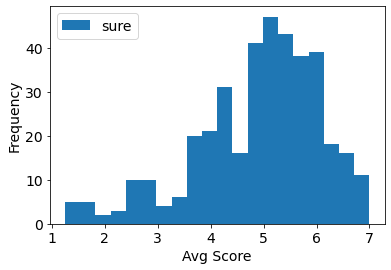

In [ ]:
plt.hist(sure_resp['total_avg'], bins=20, label='sure')
plt.legend(loc='upper left')
plt.xlabel('Avg Score')
plt.ylabel('Frequency');

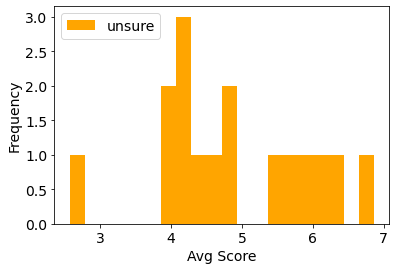

In [ ]:
plt.hist(unsure_resp['total_avg'], bins=20, label='unsure', color='orange')
plt.legend(loc='upper left')
plt.xlabel('Avg Score')
plt.ylabel('Frequency');

It's hard to tell if the two distributions have the same shape. I would still say the shapes are not too off from each other. In my lecture notes from PBLHLTH 142, 2 sample T-test is best when sample sizes are both larger than 5 and it may require larger samples if the 2 populations have very different shape, besides them being SRS's. Even so, however, if the sample sizes are larger than 15, it's okay to use T procedures. Thus, I proceeded to conduct a T-test again here.

Similar to the T-test conducted earlier, I checked the ratio of the variances of the two distributions to see if it's safe to assume their equal population variances. Turns out it is! I set `equal_var` to `True` and proceeded with the 2 sample T-test.

In [ ]:
print(np.var(sure_resp['total_avg'])/np.var(unsure_resp['total_avg']))

1.240843273124469


In [ ]:
stats.ttest_ind(unsure_resp['total_avg'], sure_resp['total_avg'], equal_var = True)

Ttest_indResult(statistic=-0.1728998890048852, pvalue=0.8628175723508975)

The P-value is 0.86, which is very large, and at 5% significance level, I fail to reject the null hypothesis, meaning the test gives evidence that the two means are equal. This also means that the two groups aren't much different another.

____
